# Introduction to Machine Learning with scikit-learn (scikit-learn.org)



### Who am I : Christopher Bonnett, Post-doc at Institut de Fisica d'Altes Energies (IFAE, UAB) working in observational cosmology. Using (Bayesian) Statistics, Machine Learning in python 

###### Today I hope to teach you the basics about 2 things: 
######1 galaxies 
######2 : machine learning 

######What is Machine Learning: Given certain examples of data, predict the properties of unknown data.

#####Today : supervised learning : we have features and labels.  We want to learn a mapping from features to labels, so given the features of a new dataset we can predict the labels

In [2]:
#Lets get started 
%matplotlib inline 
import numpy as np
import pandas as pd 
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns # plotting library based on matplotlib

sns.set_context('poster') # this changes size parameters for plotting

## Lets do regeression,  regression  is predicting a single number. 
## We will apply it the photometric redshift problem.  
##At what distance is a galaxy ? 
##Can I predict the distance based on it's photometric properties ??

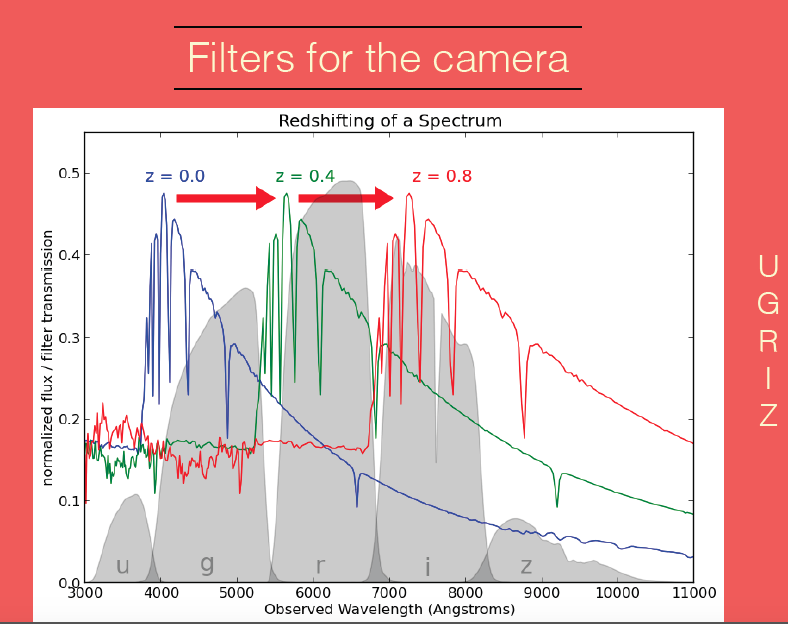

In [2]:
from IPython.display import Image
Image(filename='photz.png')

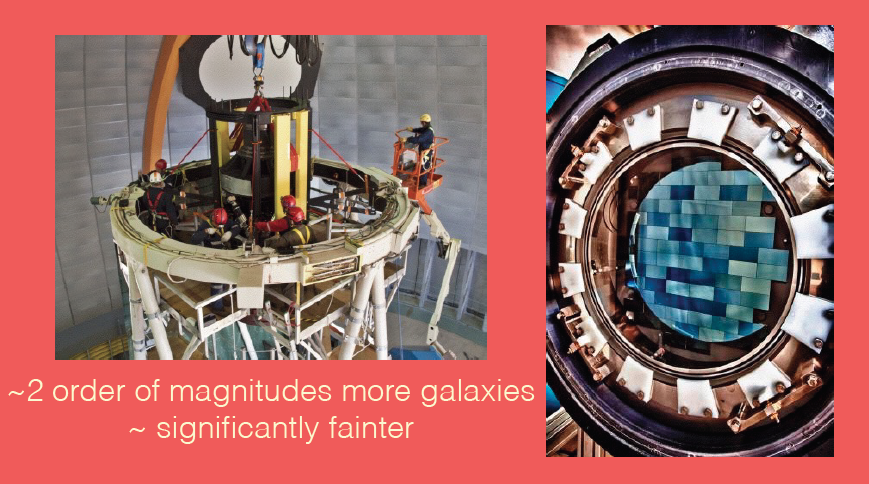

In [1]:
from IPython.display import Image
Image(filename='decam.png')

In [3]:
gal_data = pd.read_csv('galaxy_data.csv')
gal_data.head()


,u,g,r,i,z,z_spec,u-g,g-r,r-i,i-z
0,24.370872,22.827934,22.588737,23.061443,23.829391,0.434229,1.542938,0.239197,-0.472706,-0.767948
1,24.351046,23.510807,23.284801,23.955788,23.974897,0.971143,0.840239,0.226006,-0.670986,-0.019110
2,24.673836,23.111528,22.820814,23.664862,24.276768,0.654043,1.562307,0.290714,-0.844048,-0.611906
3,25.392420,22.612862,22.401258,23.541582,24.395199,0.807966,2.779558,0.211603,-1.140324,-0.853617
4,24.863710,23.164711,23.264357,23.566088,24.293219,0.611700,1.698999,-0.099646,-0.301731,-0.727131


In [4]:
print gal_data.shape

(8423, 10)


In [5]:
gal_data.describe()

,u,g,r,i,z,z_spec,u-g,g-r,r-i,i-z
count,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000
mean,24.115250,22.303676,22.013382,22.853153,23.519681,0.709624,1.811574,0.290293,-0.839771,-0.666528
std,1.157867,1.252948,1.278271,1.247159,1.165358,0.321973,1.067060,0.258098,0.466472,0.412973
min,16.814541,14.846513,14.555200,15.166270,15.706082,0.008990,-0.354967,-1.853209,-2.586233,-4.588707
25%,23.516920,21.576164,21.262815,22.173352,22.952932,0.453937,1.136087,0.158678,-1.103378,-0.863102
50%,24.163319,22.558378,22.231398,23.143744,23.732449,0.721300,1.561985,0.290279,-0.804684,-0.617334
75%,24.735808,23.236073,22.945793,23.774509,24.293059,0.947400,2.143444,0.430816,-0.517973,-0.377409
max,31.280403,24.826878,25.578854,25.877766,29.076797,1.955542,8.931068,1.430454,1.336275,0.810013


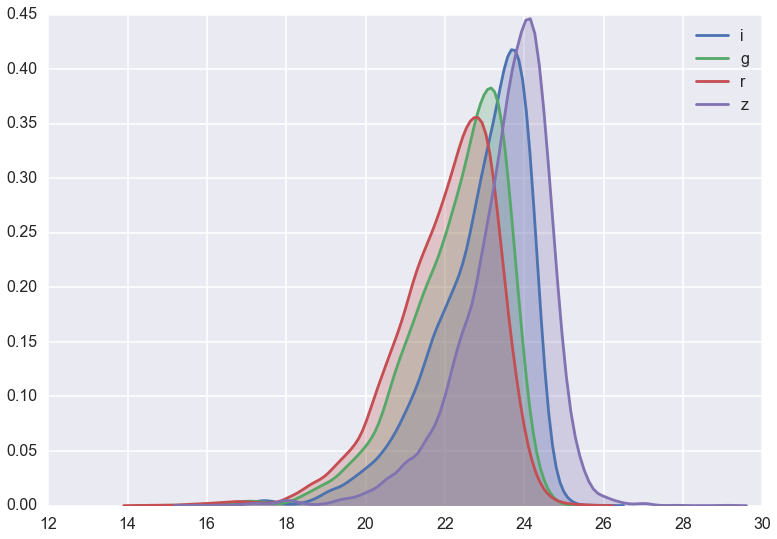

In [6]:
sns.kdeplot(gal_data.i,shade=True)
sns.kdeplot(gal_data.g,shade=True)
sns.kdeplot(gal_data.r,shade=True)
sns.kdeplot(gal_data.z,shade=True)

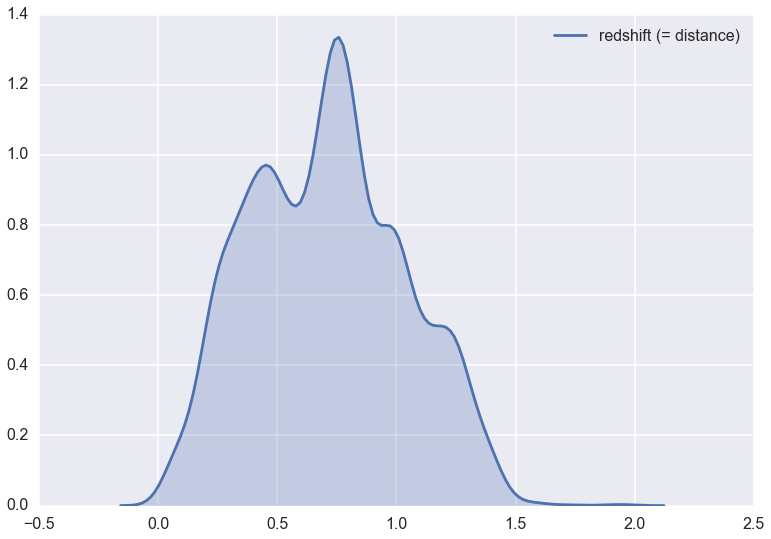

In [7]:
sns.kdeplot(gal_data.z_spec,shade=True,label= 'redshift (= distance)')

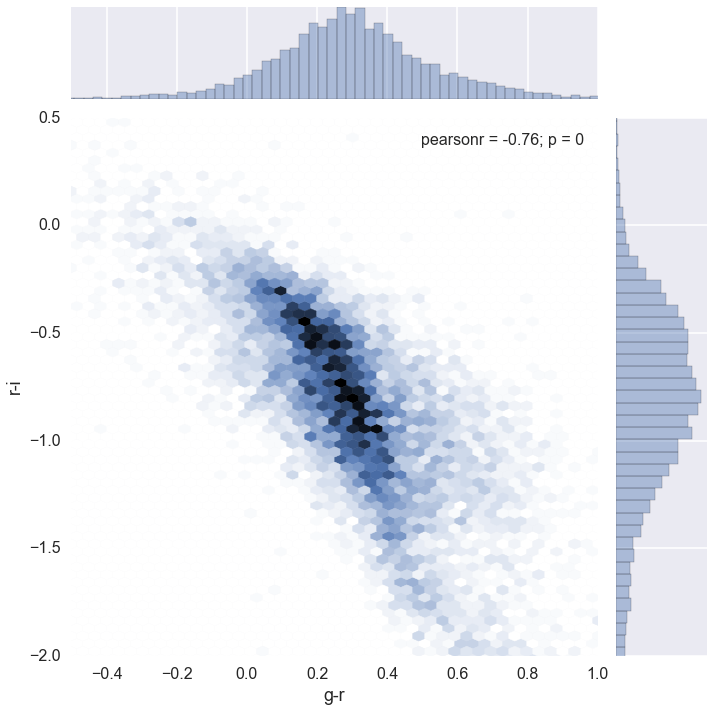

In [8]:
sns.jointplot('g-r', 'r-i', gal_data,xlim=(-0.5,1.0),ylim=(-2.0,0.5), kind='hex',size=10)

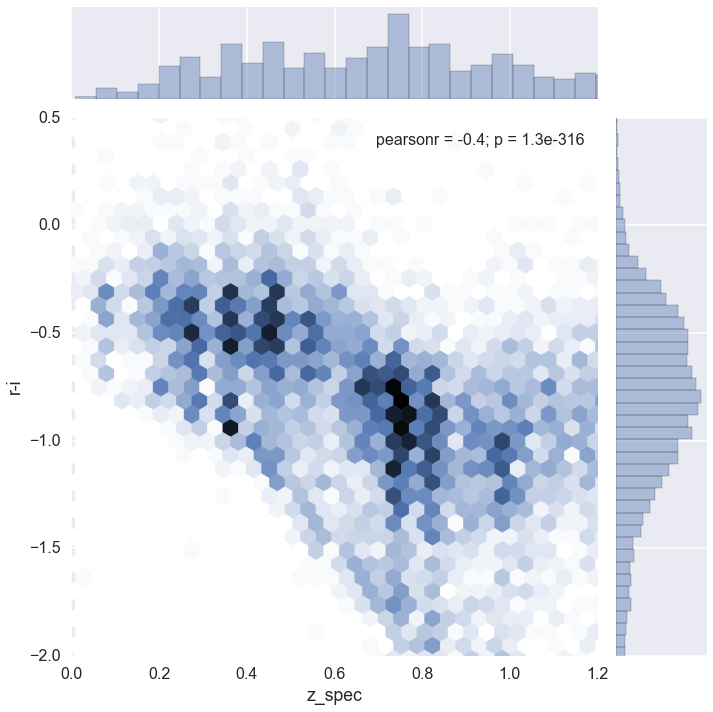

In [9]:
sns.jointplot('z_spec', 'r-i', gal_data,xlim=(0,1.2),ylim=(-2.0,0.5), kind='hex',size=10)

# We want to predict the distance of the galaxy based on u-g-r-i-z. We have many ML algo's that can do this. But we need to be able to test how well we do. So we divide our data in training set and a validation set. Ideally you would also have a blind data set

In [10]:
from sklearn.cross_validation import train_test_split

features = gal_data[['u-g','g-r','r-i','i-z','i']]
labels = gal_data[['z_spec']]

X_train, X_test, y_train, y_test,= train_test_split(features, labels, test_size=0.25, random_state=42)

In [11]:
print X_train.shape, X_test.shape, y_train.shape, y_test.shape  

(6317, 5) (2106, 5) (6317, 1) (2106, 1)


# Lets do some actually Machine Learning ! 

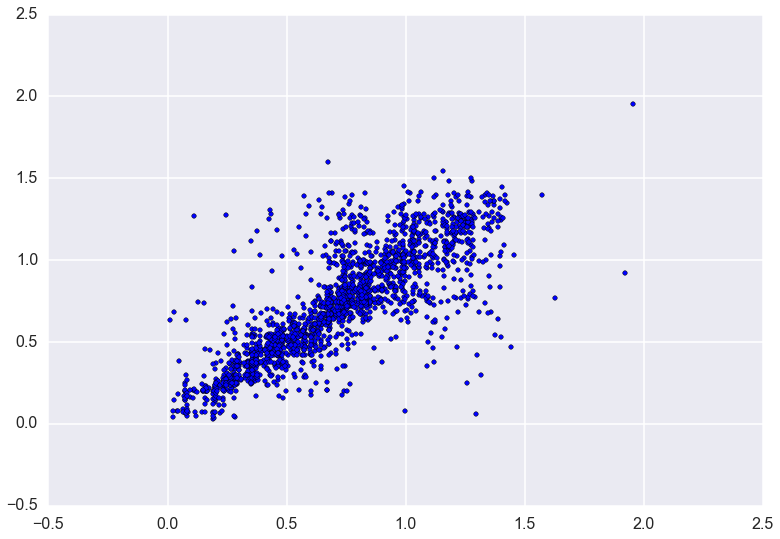

In [12]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=100)
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

plt.scatter(y_test,y_hat)

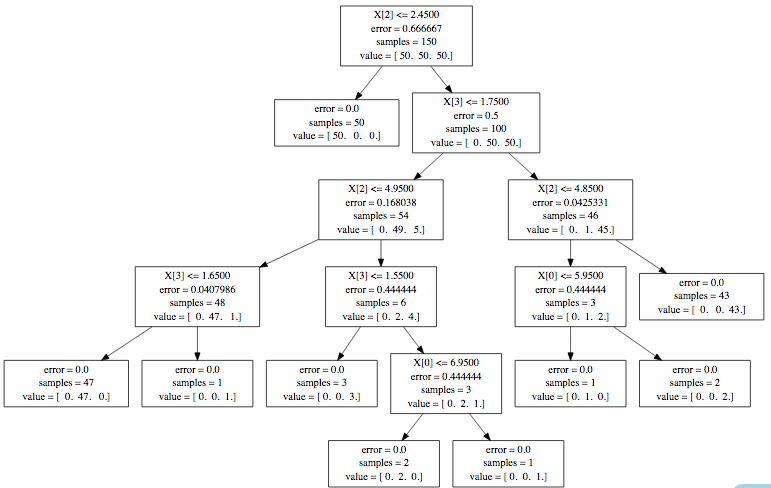

In [3]:
from IPython.display import Image
Image(filename='DT.png')

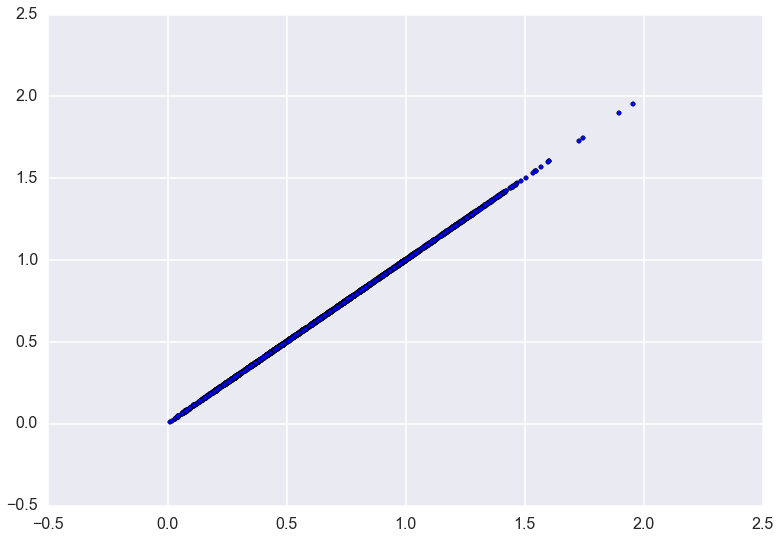

In [14]:
y_hat_train= clf.predict(X_train)
plt.scatter(y_train,y_hat_train)

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print 'Error on Test set', mse(y_test, y_hat)
print 'Error on training set', mse(y_train, y_hat_train)

Error on Test set 0.0387445832862
Error on training set 1.95688584024e-09


# Can we do better ? of course we can ! Lets try random forests 

In [17]:
from sklearn.ensemble import RandomForestRegressor as rfr

#A random forest is a combination of trees that are de-correlated. Why does this work ? 


Single Tree on Test set 0.0387445832862
Random Forest on Test set 0.0211956683106


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from IPython.kernel.zmq import kernelapp as app


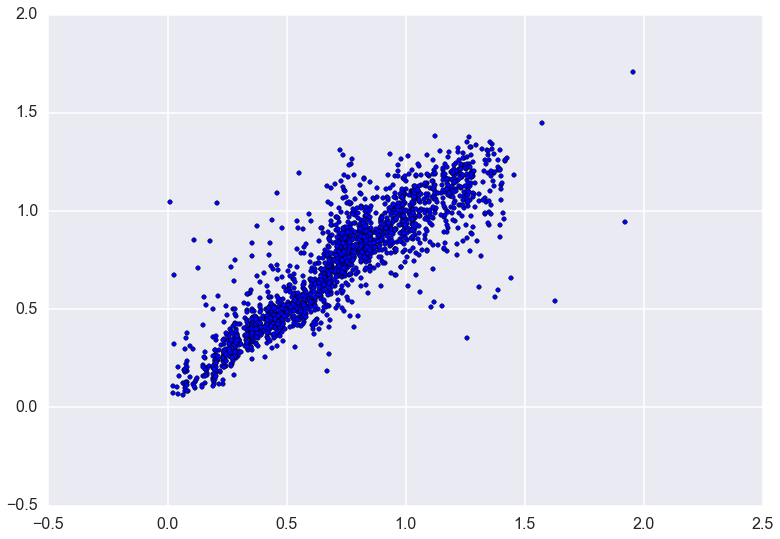

In [18]:
estimator = rfr(n_estimators=10)
estimator = estimator.fit(X_train, y_train)
y_hat_rf = estimator.predict(X_test)

plt.scatter(y_test,y_hat_rf)
print 'Single Tree on Test set', mse(y_test, y_hat)
print 'Random Forest on Test set', mse(y_test, y_hat_rf)

# Can we do even better by turning some knobs ? 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Single Tree on Test set 0.0387445832862
Random Forest on Test set 0.0211956683106
Random Forest Grid Search on Test set 0.0205972696362


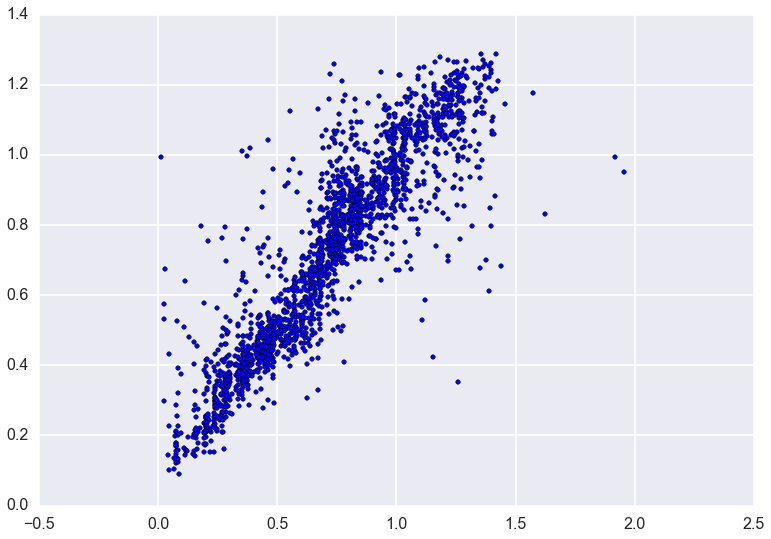

In [22]:
from sklearn.grid_search import GridSearchCV
gs_rfr = rfr()

params = {'n_estimators':(20,50,100),
          'min_samples_split':(2,20),
          'min_samples_leaf':(10,30),
          'max_features':(0.7,0.5,0.3)
          }

grid_search = GridSearchCV(gs_rfr,param_grid=params,n_jobs=-1, verbose=0, cv=5)
grid_search.fit(X_train, np.ravel(y_train))
print grid_search.best_estimator_
y_hat_rf_grid_search = grid_search.predict(X_test)

plt.scatter(y_test, y_hat_rf_grid_search)
print 'Single Tree on Test set', mse(y_test, y_hat)
print 'Random Forest on Test set', mse(y_test, y_hat_rf)
print 'Random Forest Grid Search on Test set', mse(y_test, y_hat_rf_grid_search)